# <center> Clasificación y Generación de Dígitos con la Base de datos MNIST <center>
    
    Nombres:
    Correo:

## 1) Ingreso de los Datos:
Training:

Test:

Ingreso de Paquetes

In [1]:
# inicialmente utilizamos los datos de keras, según digitalocean:
# https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
# También se pueden descargar de:
# https://www.kaggle.com/datasets/hojjatk/mnist-dataset
!(pip install keras)
!(pip install scikit-learn)
!(pip install tensorflow)
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

2023-09-26 16:46:40.455321: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 16:46:43.854347: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 16:46:43.869000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 16:46:50.183950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Cargamos los datos

Convertimos a numpy para poder llamar los elementos más fácilmente

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print('X_train: ',x_train.shape)
print('Y_train: ',y_train.shape)
print('X_test:  ',x_test.shape)
print('Y_test:  ',y_test.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


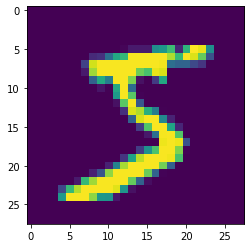

In [3]:
plt.imshow(x_train[0])

In [4]:
y_train[0]

5

## 2) Implementación del Modelo

In [5]:
dim=x_train.shape
x_train_p=x_train.reshape(dim[0],dim[1]*dim[2])
dim=x_test.shape
x_test_p=x_test.reshape(dim[0],dim[1]*dim[2])

In [6]:
nb_classifier = GaussianNB() #MultinomialNB()
nb_classifier.fit(x_train_p, y_train)

GaussianNB()

## 3) Desempeño de Generalización del Problema de Clasificación
problem generalization performance

In [7]:
y_pred = nb_classifier.predict(x_test_p)
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test_p.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 4442


In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5558
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



In [17]:
y_pred

array([9, 2, 1, ..., 9, 8, 6], dtype=uint8)

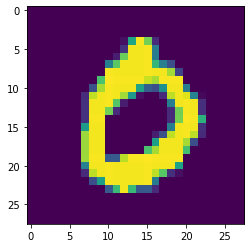

In [15]:
plt.imshow(x_test[3])

In [11]:
x_test.shape

(10000, 28, 28)